## Проект №3. Определение перспективного тарифа для телеком компании
### Описание проекта
В ходе проекта предстоит проанализировать данные 500 пользователей телеком компании "Мегалайн" за 2018 год. Данные включают в себя имя и фамилию, местонахождение, какой тариф, количество звонков, сообщений и др. Необходимо выяснить, какой тариф приносит больше прибыли компании: "Ультра" или "Смарт".

**Тариф «Смарт»**
1. Ежемесячная плата: 550 рублей
2. Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
3. Стоимость услуг сверх тарифного пакета:

 * минута разговора: 3 рубля («Мегалайн» всегда округляет вверх значения минут и мегабайтов. Если пользователь проговорил всего 1 секунду, в тарифе засчитывается целая минута.)
 * сообщение: 3 рубля
 * 1 Гб интернет-трафика: 200 рублей

**Тариф «Ультра»**

1. Ежемесячная плата: 1950 рублей
2. Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
3. Стоимость услуг сверх тарифного пакета:
 * минута разговора: 1 рубль
 * сообщение: 1 рубль
 * 1 Гб интернет-трафика: 150 рублей

### Цели проекта
* Привести данные к нужным типам
* Найти и исправить ошибки в данных
* Правильно собрать данные воедино и добавить столбцы с необходимыми для анализа значениями
* Проанализировать данные
* Проверить гипотезы

------

## Этап 1. Предобработка данных
### Общая информация о данных и приведение данных к нужным типам

Импортируем необходимые модули и библиотеки.

In [222]:
import pandas as pd
import math
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st

Прочитаем файл *calls.csv*, указав как разделитель знак запятой: `','` и сохраним его в переменной `data_calls`.

In [223]:
data_calls = pd.read_csv('/datasets/calls.csv', sep=',')

Выведем на экран первые 10 строк таблицы и общую информацию о данных.

In [224]:
data_calls.head(10)

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
5,1000_5,2018-11-02,0.00,1000
6,1000_6,2018-10-18,0.00,1000
7,1000_7,2018-08-22,18.31,1000
8,1000_8,2018-09-15,18.44,1000
9,1000_9,2018-08-15,0.00,1000


In [225]:
data_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


Необходимо поменять тип данных значений столбцов *'call_date'* и *'duration'*.

Проверим количество пользователей в таблице `data_calls`.

In [226]:
len(data_calls['user_id'].unique())

492

Не хватает информации о 8 клиентах. При объединении с таблицей данных о пользователях возникнут пропуски, которые нужно будет заполнить.

Имеются звонки продолжнительностью *0.0 минут*. Скорее всего, это звонки, продолжительность которых была меньше одной минуты, но почему-то неправильно округленные. Создадим новый столбец *'duration_true'* в таблице `data_calls`. Приведем данные столбца к целочисленному типу методом `astype('int')` и для правильного округления по правилам тарифов в большую сторону прибавим к значениям 1.

In [227]:
data_calls['duration_true'] = data_calls['duration'].astype('int') + 1

Создадим столбец *'date_of_call'*, для того, чтобы перевести значения столбца *'call_date'* в формат даты.

In [228]:
data_calls['date_of_call'] = pd.to_datetime(data_calls['call_date'], format='%Y-%m-%d')

Посмотрим, что получилось.

In [229]:
data_calls.head(10)

,id,call_date,duration,user_id,duration_true,date_of_call
0,1000_0,2018-07-25,0.00,1000,1,2018-07-25
1,1000_1,2018-08-17,0.00,1000,1,2018-08-17
2,1000_2,2018-06-11,2.85,1000,3,2018-06-11
3,1000_3,2018-09-21,13.80,1000,14,2018-09-21
4,1000_4,2018-12-15,5.18,1000,6,2018-12-15
5,1000_5,2018-11-02,0.00,1000,1,2018-11-02
6,1000_6,2018-10-18,0.00,1000,1,2018-10-18
7,1000_7,2018-08-22,18.31,1000,19,2018-08-22
8,1000_8,2018-09-15,18.44,1000,19,2018-09-15
9,1000_9,2018-08-15,0.00,1000,1,2018-08-15


In [230]:
data_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 6 columns):
id               202607 non-null object
call_date        202607 non-null object
duration         202607 non-null float64
user_id          202607 non-null int64
duration_true    202607 non-null int64
date_of_call     202607 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 9.3+ MB


Данные таблицы `data_calls` готовы для дальнейшего анализа.

Аналогичным образом читаем файлы *'internet.csv'*, *'messages.csv'*, *'tariffs.csv'* и *'users.csv'* и записываем их в переменные `data_internet`, `data_messages`, `data_tariffs` и `data_users` соответственно. Также в каждой таблице находим информацию о количестве пользователей. Меняем тип данных значений количества сообщений и мегабайт на целочисленный и округляем значения в большую сторону. Меняем тип данных значений даты на *'datetime64'*.

In [231]:
data_internet = pd.read_csv('/datasets/internet.csv', sep=',')

In [232]:
data_internet.head(10)

,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000
5,1000_5,399.97,2018-10-02,1000
6,1000_6,540.08,2018-09-07,1000
7,1000_7,415.70,2018-07-11,1000
8,1000_8,505.40,2018-10-08,1000
9,1000_9,345.54,2018-09-03,1000


In [233]:
len(data_internet['user_id'].unique())

497

In [234]:
data_internet['mb_used_true'] = data_internet['mb_used'].astype('int') + 1

In [235]:
data_internet['date_of_session'] = pd.to_datetime(data_internet['session_date'], format='%Y-%m-%d')

In [236]:
data_internet.head(10)

,id,mb_used,session_date,user_id,mb_used_true,date_of_session
0,1000_0,112.95,2018-11-25,1000,113,2018-11-25
1,1000_1,1052.81,2018-09-07,1000,1053,2018-09-07
2,1000_2,1197.26,2018-06-25,1000,1198,2018-06-25
3,1000_3,550.27,2018-08-22,1000,551,2018-08-22
4,1000_4,302.56,2018-09-24,1000,303,2018-09-24
5,1000_5,399.97,2018-10-02,1000,400,2018-10-02
6,1000_6,540.08,2018-09-07,1000,541,2018-09-07
7,1000_7,415.70,2018-07-11,1000,416,2018-07-11
8,1000_8,505.40,2018-10-08,1000,506,2018-10-08
9,1000_9,345.54,2018-09-03,1000,346,2018-09-03


In [237]:
data_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 6 columns):
id                 149396 non-null object
mb_used            149396 non-null float64
session_date       149396 non-null object
user_id            149396 non-null int64
mb_used_true       149396 non-null int64
date_of_session    149396 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 6.8+ MB


In [238]:
data_messages = pd.read_csv('/datasets/messages.csv', sep=',')

In [239]:
data_messages.head(10)

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
5,1000_5,2018-06-20,1000
6,1000_6,2018-11-19,1000
7,1000_7,2018-10-29,1000
8,1000_8,2018-06-25,1000
9,1000_9,2018-12-18,1000


In [240]:
len(data_messages['user_id'].unique())

426

In [241]:
data_messages['date_of_messages'] = pd.to_datetime(data_messages['message_date'], format='%Y-%m-%d')

In [242]:
data_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 4 columns):
id                  123036 non-null object
message_date        123036 non-null object
user_id             123036 non-null int64
date_of_messages    123036 non-null datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 3.8+ MB


In [243]:
data_tariffs = pd.read_csv('/datasets/tariffs.csv', sep=',')

In [244]:
data_tariffs.head(10)

,messages_included,mg_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [245]:
data_tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mg_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 208.0+ bytes


In [246]:
data_users = pd.read_csv('/datasets/users.csv', sep=',')

In [247]:
data_users.head(10)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
5,1005,67,NaN,Набережные Челны,Афанасий,Горлов,2018-01-25,smart
6,1006,21,NaN,Ульяновск,Леонид,Ермолаев,2018-02-26,smart
7,1007,65,NaN,Москва,Юна,Березина,2018-04-19,smart
8,1008,63,NaN,Челябинск,Рустэм,Пономарёв,2018-12-19,smart
9,1009,24,NaN,Пермь,Василиса,Блинова,2018-03-22,smart


In [248]:
len(data_users['user_id'].unique())

500

In [249]:
data_users['date_of_reg'] = pd.to_datetime(data_users['reg_date'], format='%Y-%m-%d')

Заменяем пропуски в значениях столбца *'churn_date'* на *0*.

In [250]:
data_users['churn_date'] = data_users['churn_date'].fillna(0)

In [251]:
data_users['date_of_churn'] = pd.to_datetime(data_users['churn_date'], format='%Y-%m-%d')

In [252]:
data_users.head(10)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,date_of_reg,date_of_churn
0,1000,52,0,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,2018-05-25,1970-01-01
1,1001,41,0,Москва,Иван,Ежов,2018-11-01,smart,2018-11-01,1970-01-01
2,1002,59,0,Стерлитамак,Евгений,Абрамович,2018-06-17,smart,2018-06-17,1970-01-01
3,1003,23,0,Москва,Белла,Белякова,2018-08-17,ultra,2018-08-17,1970-01-01
4,1004,68,0,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra,2018-05-14,1970-01-01
5,1005,67,0,Набережные Челны,Афанасий,Горлов,2018-01-25,smart,2018-01-25,1970-01-01
6,1006,21,0,Ульяновск,Леонид,Ермолаев,2018-02-26,smart,2018-02-26,1970-01-01
7,1007,65,0,Москва,Юна,Березина,2018-04-19,smart,2018-04-19,1970-01-01
8,1008,63,0,Челябинск,Рустэм,Пономарёв,2018-12-19,smart,2018-12-19,1970-01-01
9,1009,24,0,Пермь,Василиса,Блинова,2018-03-22,smart,2018-03-22,1970-01-01


In [253]:
data_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
user_id          500 non-null int64
age              500 non-null int64
churn_date       500 non-null object
city             500 non-null object
first_name       500 non-null object
last_name        500 non-null object
reg_date         500 non-null object
tariff           500 non-null object
date_of_reg      500 non-null datetime64[ns]
date_of_churn    500 non-null datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(6)
memory usage: 39.1+ KB


Данные таблиц `data_internet`, `data_messages`, `data_tariffs` и `data_users` также готовы для дальнейшего анализа.

------

### Построение общей таблицы и добавление необходимых для анализа значений

По заданию необходимо посчитать количество сделанных звонков и количество использованных минут разговора по месяцам. Для этого в таблице `data_calls` создаем столбец *'month'*.

In [254]:
data_calls['month'] = data_calls['date_of_call'].dt.month

Создаем сводную таблицу `count_sum_calls_per_month`, в качестве индексов выбираем значения столбцов *'user_id'* и *'month'*, в качестве значений выбираем *'duration_true'*, в качестве функций выбираем `count` и `sum`.

In [255]:
count_sum_calls_per_month = (data_calls
                                .pivot_table(index=['user_id', 'month'], values='duration_true', aggfunc={'count', 'sum'})
                        )

Выводим первые 10 строк таблицы `count_sum_calls_per_month`.

In [258]:
count_sum_calls_per_month.head(10)

count  sum
user_id month            
1000    5         22  164
        6         43  187
        7         47  346
        8         52  419
        9         58  479
        10        57  363
        11        43  344
        12        46  341
1001    11        59  444
        12        63  430

Переименуем названия столбцов *'count'* и *'sum'* на *'count_calls'* и *'duration_true'* соответственно.

In [259]:
count_sum_calls_per_month = count_sum_calls_per_month.rename(columns={"count": "count_calls", "sum": "duration_true"})

Аналогичные операции проводим для нахождения израсходованных минут разговора, отправленных сообщений и объема израсходованного интернет-трафика по месяцам. Создаем сводные таблицы ~~`sum_calls_per_month`~~, `count_messages_per_month` и `sum_mb_per_month` соответственно.

In [262]:
data_messages['month'] = data_messages['date_of_messages'].dt.month

In [263]:
count_messages_per_month = (data_messages
                                .pivot_table(index=['user_id', 'month'], values='id', aggfunc='count')
                         )

In [264]:
count_messages_per_month.head(10)

id
user_id month    
1000    5      22
        6      60
        7      75
        8      81
        9      57
        10     73
        11     58
        12     70
1002    6       4
        7      11

In [265]:
count_messages_per_month = count_messages_per_month.rename(columns={"id": "count_messages"})

In [266]:
data_internet['month'] = data_internet['date_of_session'].dt.month

In [267]:
sum_mb_per_month = (data_internet
                            .pivot_table(index=['user_id', 'month'], values='mb_used_true', aggfunc='sum')
                   )

In [268]:
sum_mb_per_month.head(10)

mb_used_true
user_id month              
1000    5              2257
        6             23262
        7             14017
        8             14072
        9             14583
        10            14717
        11            14769
        12             9829
1001    11            18460
        12            14059

Сводные таблицы готовы. 

Теперь необходимо собрать данные в одну таблицу. Добавлять данные будем к таблице `data_users`. Объединять данные будем методом `join()` по индексу *'user_id'*.

Для этого выберем в таблице `data_users` значения столбца *'user_id'* в качестве индексов. Используем метод `set_index()`.

In [269]:
data_users = data_users.set_index('user_id')

Последовательно добавим таблицы `count_sum_calls_per_month`, ~~`sum_calls_per_month`~~, `count_messages_per_month` и `sum_mb_per_month` к таблице `data_users`. Получившуюся таблицу сохранеям в переменной `users`.

In [270]:
users = data_users.join(count_sum_calls_per_month)

In [272]:
users = users.join(count_messages_per_month)

In [273]:
users = users.join(sum_mb_per_month)

Выведем первые 10 строк таблицы `users` на экран.

In [274]:
users.head(10)

age churn_date       city first_name  last_name    reg_date  \
user_id month                                                                
1000    5       52          0  Краснодар     Рафаил  Верещагин  2018-05-25   
        6       52          0  Краснодар     Рафаил  Верещагин  2018-05-25   
        7       52          0  Краснодар     Рафаил  Верещагин  2018-05-25   
        8       52          0  Краснодар     Рафаил  Верещагин  2018-05-25   
        9       52          0  Краснодар     Рафаил  Верещагин  2018-05-25   
        10      52          0  Краснодар     Рафаил  Верещагин  2018-05-25   
        11      52          0  Краснодар     Рафаил  Верещагин  2018-05-25   
        12      52          0  Краснодар     Рафаил  Верещагин  2018-05-25   
1001    11      41          0     Москва       Иван       Ежов  2018-11-01   
        12      41          0     Москва       Иван       Ежов  2018-11-01   

              tariff date_of_reg date_of_churn  count_calls  duration_true  \
user_id month                                                                
1000    5      ultra  2018-05-25    1970-01-01           22            164   
        6      ultra  2018-05-25    1970-01-01           43            187   
        7      ultra  2018-05-25    1970-01-01           47            346   
        8      ultra  2018-05-25    1970-01-01           52            419   
        9      ultra  2018-05-25    1970-01-01           58            479   
        10     ultra  2018-05-25    1970-01-01           57            363   
        11     ultra  2018-05-25    1970-01-01           43            344   
        12     ultra  2018-05-25    1970-01-01           46            341   
1001    11     smart  2018-11-01    1970-01-01           59            444   
        12     smart  2018-11-01    1970-01-01           63            430   

               count_messages  mb_used_true  
user_id month                                
1000    5                22.0        2257.0  
        6                60.0       23262.0  
        7                75.0       14017.0  
        8                81.0       14072.0  
        9                57.0       14583.0  
        10               73.0       14717.0  
        11               58.0       14769.0  
        12               70.0        9829.0  
1001    11                NaN       18460.0  
        12                NaN       14059.0

Выведем общую информацию о таблице `users` на экран.

In [275]:
users.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 3174 entries, (1000, 5) to (1499, 12)
Data columns (total 13 columns):
age               3174 non-null int64
churn_date        3174 non-null object
city              3174 non-null object
first_name        3174 non-null object
last_name         3174 non-null object
reg_date          3174 non-null object
tariff            3174 non-null object
date_of_reg       3174 non-null datetime64[ns]
date_of_churn     3174 non-null datetime64[ns]
count_calls       3174 non-null int64
duration_true     3174 non-null int64
count_messages    2678 non-null float64
mb_used_true      3163 non-null float64
dtypes: datetime64[ns](2), float64(2), int64(3), object(6)
memory usage: 495.8+ KB


Имеются пропуски в значениях столбцов *'count_messages'* и *'mb_used_true'*, также "изменился" тип данных на вещественный. Исправим эти ошибки. Пропуски возникли из-за отсутствия информации о потраченных минутах, отпправленных сообщений и объеме израсходованного интернет-трафика некоторых пользователей. Эти значения можно заменить на 0. Возможно, это те клиенты, которые уже прекратили пользоваться услугами данной телеком компании.

In [276]:
users = users.fillna(0)

Поменяем тип данных на целочисленный.

In [277]:
users.count_messages = users.count_messages.astype('int')

In [278]:
users.mb_used_true = users.mb_used_true.astype('int')

Проверим, что получилось.

In [279]:
users.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 3174 entries, (1000, 5) to (1499, 12)
Data columns (total 13 columns):
age               3174 non-null int64
churn_date        3174 non-null object
city              3174 non-null object
first_name        3174 non-null object
last_name         3174 non-null object
reg_date          3174 non-null object
tariff            3174 non-null object
date_of_reg       3174 non-null datetime64[ns]
date_of_churn     3174 non-null datetime64[ns]
count_calls       3174 non-null int64
duration_true     3174 non-null int64
count_messages    3174 non-null int64
mb_used_true      3174 non-null int64
dtypes: datetime64[ns](2), int64(5), object(6)
memory usage: 495.8+ KB


Для наглядности поменяем названия столбцов *'duration_true'* и *'mb_used_true'* на *'duration_calls'* и *'quantity_mb'* соответственно.

In [280]:
users = users.rename(columns={"duration_true": "duration_calls", "mb_used_true": "quantity_mb"})

Выведем первые 10 строк таблицы `users` на экран.

In [281]:
users.head(10)

age churn_date       city first_name  last_name    reg_date  \
user_id month                                                                
1000    5       52          0  Краснодар     Рафаил  Верещагин  2018-05-25   
        6       52          0  Краснодар     Рафаил  Верещагин  2018-05-25   
        7       52          0  Краснодар     Рафаил  Верещагин  2018-05-25   
        8       52          0  Краснодар     Рафаил  Верещагин  2018-05-25   
        9       52          0  Краснодар     Рафаил  Верещагин  2018-05-25   
        10      52          0  Краснодар     Рафаил  Верещагин  2018-05-25   
        11      52          0  Краснодар     Рафаил  Верещагин  2018-05-25   
        12      52          0  Краснодар     Рафаил  Верещагин  2018-05-25   
1001    11      41          0     Москва       Иван       Ежов  2018-11-01   
        12      41          0     Москва       Иван       Ежов  2018-11-01   

              tariff date_of_reg date_of_churn  count_calls  duration_calls  \
user_id month                                                                 
1000    5      ultra  2018-05-25    1970-01-01           22             164   
        6      ultra  2018-05-25    1970-01-01           43             187   
        7      ultra  2018-05-25    1970-01-01           47             346   
        8      ultra  2018-05-25    1970-01-01           52             419   
        9      ultra  2018-05-25    1970-01-01           58             479   
        10     ultra  2018-05-25    1970-01-01           57             363   
        11     ultra  2018-05-25    1970-01-01           43             344   
        12     ultra  2018-05-25    1970-01-01           46             341   
1001    11     smart  2018-11-01    1970-01-01           59             444   
        12     smart  2018-11-01    1970-01-01           63             430   

               count_messages  quantity_mb  
user_id month                               
1000    5                  22         2257  
        6                  60        23262  
        7                  75        14017  
        8                  81        14072  
        9                  57        14583  
        10                 73        14717  
        11                 58        14769  
        12                 70         9829  
1001    11                  0        18460  
        12                  0        14059

Следующим шагом необходимо посчитать помесячную выручку с каждого пользователя. Необходимо учесть тариф, которым пользуются клиенты, количество потраченных минут, отправленных сообщений и мегабайт трафика сверх пакета, а также ежемесячную плату по тарифу.

Для этого напишем функцию `purchase`.

In [282]:
def purchase(row):                                    # принимает строку таблицы в качестве аргументы
    purchase = 0
    tariff = row['tariff']                            # присваиваем переменным необходимые для расчета значения таблицы
    minutes = row['duration_calls']
    messages = row['count_messages']
    megabytes = row['quantity_mb']
    if tariff == 'smart':                             # прописываем для тарифа smart необходимые условия расчета
        if minutes > 500:
            purchase = (minutes - 500) * 3
        if messages > 50:
            purchase += (messages - 50) * 3
        if megabytes > 15000:
            purchase += (megabytes - 15000) * 0.2
        return purchase + 550
    else:                                             # прописываем для тарифа ultra необходимые условия расчета
        if minutes > 3000:
            purchase = minutes - 3000
        if messages > 1000:
            purchase += messages - 1000
        if megabytes > 30000:
            purchase += (megabytes - 30000) * 0.15
        return purchase + 1950

Создаем в таблице `users` новый столбец *'purchase'*, применив к таблице функцию `purchase`.

In [283]:
users['purchase'] = users.apply(purchase, axis=1)

Выведем на экран первые 10 строк таблицы 

In [284]:
users.head(10)

age churn_date       city first_name  last_name    reg_date  \
user_id month                                                                
1000    5       52          0  Краснодар     Рафаил  Верещагин  2018-05-25   
        6       52          0  Краснодар     Рафаил  Верещагин  2018-05-25   
        7       52          0  Краснодар     Рафаил  Верещагин  2018-05-25   
        8       52          0  Краснодар     Рафаил  Верещагин  2018-05-25   
        9       52          0  Краснодар     Рафаил  Верещагин  2018-05-25   
        10      52          0  Краснодар     Рафаил  Верещагин  2018-05-25   
        11      52          0  Краснодар     Рафаил  Верещагин  2018-05-25   
        12      52          0  Краснодар     Рафаил  Верещагин  2018-05-25   
1001    11      41          0     Москва       Иван       Ежов  2018-11-01   
        12      41          0     Москва       Иван       Ежов  2018-11-01   

              tariff date_of_reg date_of_churn  count_calls  duration_calls  \
user_id month                                                                 
1000    5      ultra  2018-05-25    1970-01-01           22             164   
        6      ultra  2018-05-25    1970-01-01           43             187   
        7      ultra  2018-05-25    1970-01-01           47             346   
        8      ultra  2018-05-25    1970-01-01           52             419   
        9      ultra  2018-05-25    1970-01-01           58             479   
        10     ultra  2018-05-25    1970-01-01           57             363   
        11     ultra  2018-05-25    1970-01-01           43             344   
        12     ultra  2018-05-25    1970-01-01           46             341   
1001    11     smart  2018-11-01    1970-01-01           59             444   
        12     smart  2018-11-01    1970-01-01           63             430   

               count_messages  quantity_mb  purchase  
user_id month                                         
1000    5                  22         2257    1950.0  
        6                  60        23262    1950.0  
        7                  75        14017    1950.0  
        8                  81        14072    1950.0  
        9                  57        14583    1950.0  
        10                 73        14717    1950.0  
        11                 58        14769    1950.0  
        12                 70         9829    1950.0  
1001    11                  0        18460    1242.0  
        12                  0        14059     550.0

Данные готовы для дальнейшего анализа.

------

### Анализ распределений и удаление выбросов

Построим гистограммы распределения и диаграммы размаха количества звонков, длительности разговоров, отправленных сообщений, потраченного объема интернет-трафика клиентов и прибыли с каждого клиента. Также выведем информацию о главных статистических характеристиках и о верхней границе выбросов для этих распределений.

Автоматизируем построение графиков с помощью цикла `for in`, для построения графиков рядом в одной строке используем аргумент `ax = plt.subplot()`. Для получения статистических характеристик используем метод `describe()`, для нахождения верхней границы выбросов используем формулу `Q3 + 1.5*(Q3-Q1)` и метод `quantile()`.

COUNT_CALLS


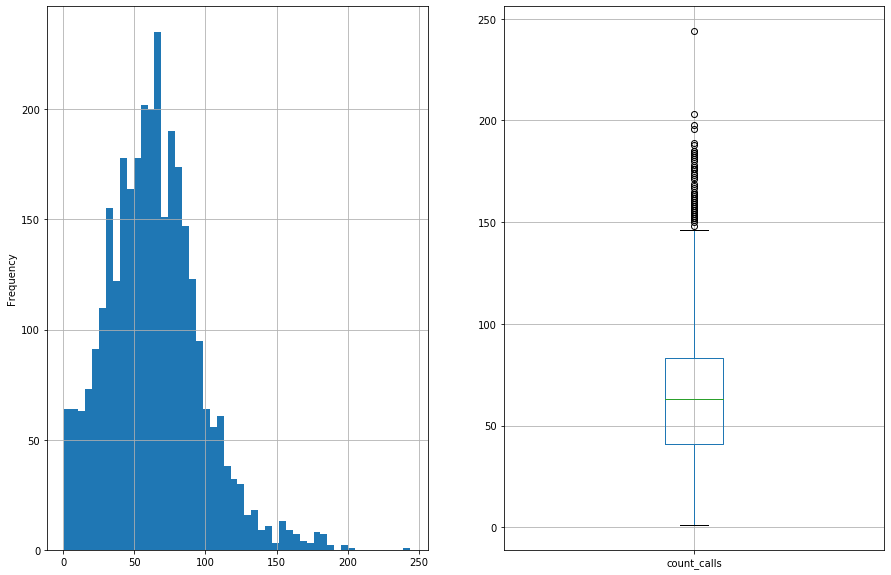

count    3174.000000
mean       63.833333
std        32.678036
min         1.000000
25%        41.000000
50%        63.000000
75%        83.000000
max       244.000000
Name: count_calls, dtype: float64
Верхняя граница выбросов: 146

DURATION_CALLS


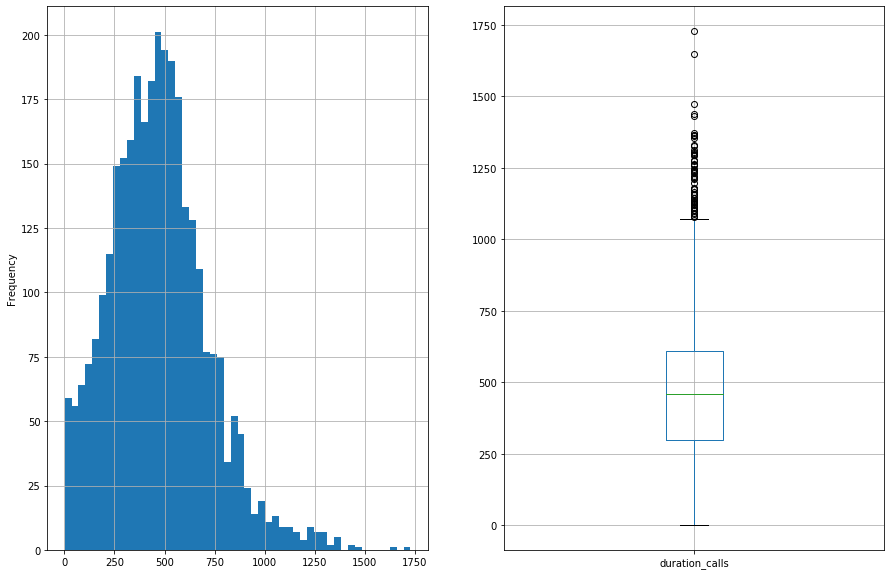

count    3174.000000
mean      469.899496
std       244.138431
min         1.000000
25%       298.000000
50%       459.000000
75%       608.750000
max      1728.000000
Name: duration_calls, dtype: float64
Верхняя граница выбросов: 1075

COUNT_MESSAGES


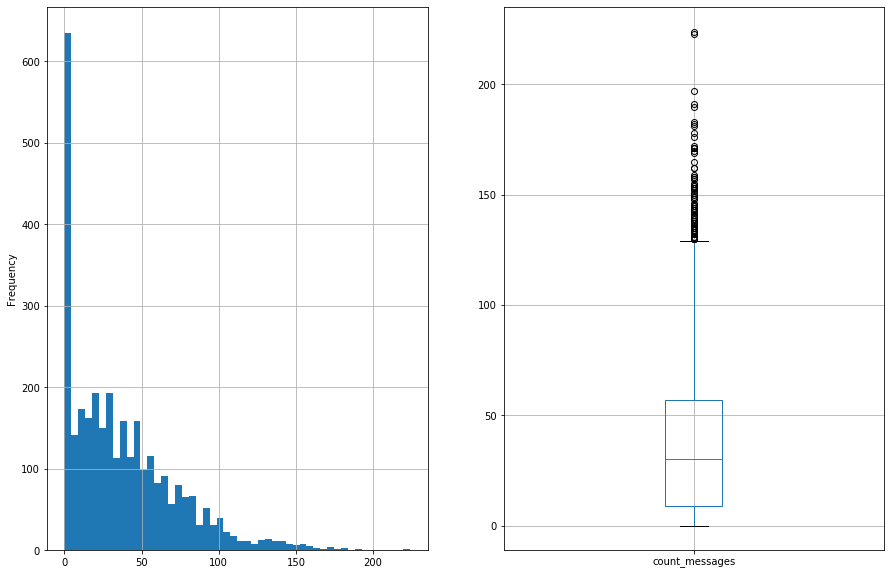

count    3174.000000
mean       38.081601
std        35.621296
min         0.000000
25%         9.000000
50%        30.000000
75%        57.000000
max       224.000000
Name: count_messages, dtype: float64
Верхняя граница выбросов: 129

QUANTITY_MB


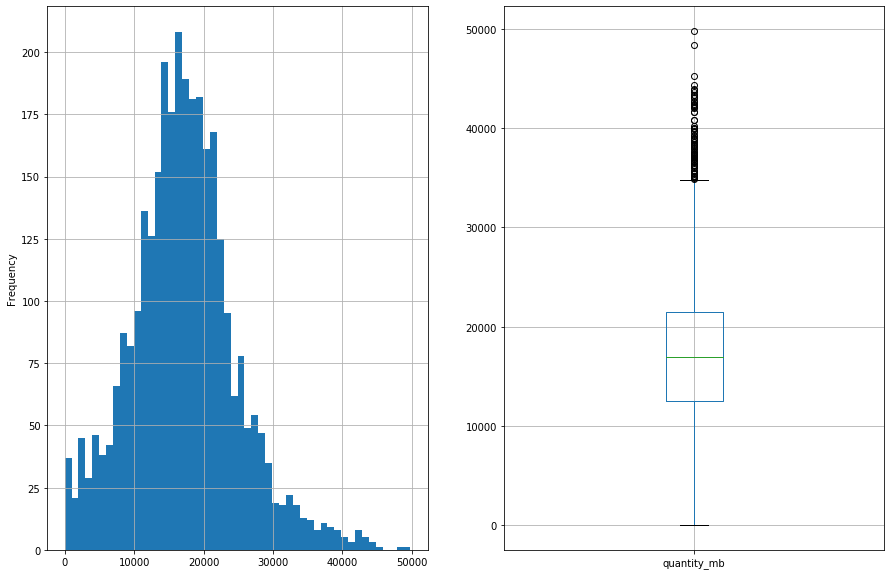

count     3174.000000
mean     17210.605545
std       7565.341677
min          0.000000
25%      12501.750000
50%      16951.500000
75%      21439.000000
max      49793.000000
Name: quantity_mb, dtype: float64
Верхняя граница выбросов: 34845

PURCHASE


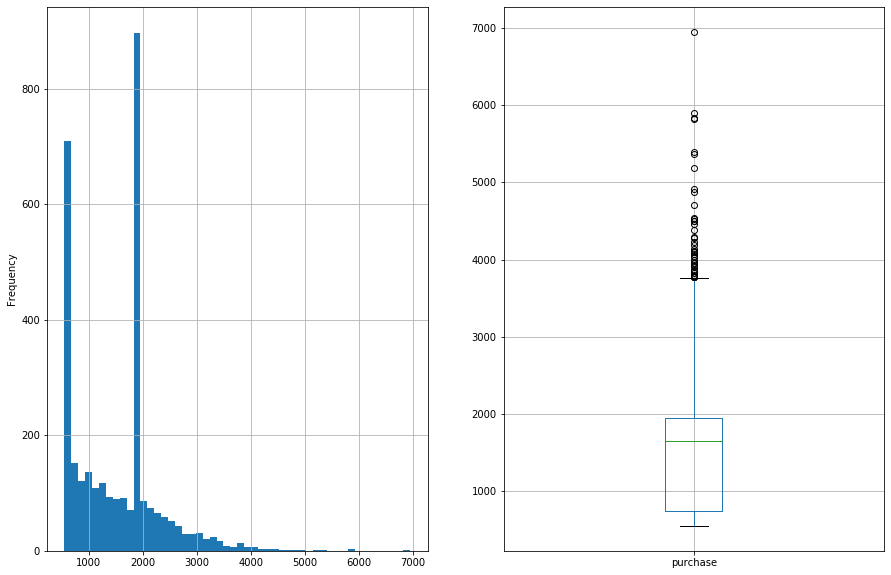

count    3174.000000
mean     1540.149779
std       813.606318
min       550.000000
25%       741.400000
50%      1656.600000
75%      1950.000000
max      6949.600000
Name: purchase, dtype: float64
Верхняя граница выбросов: 3763



In [285]:
for name in ['count_calls', 'duration_calls', 'count_messages', 'quantity_mb', 'purchase']:
    print(name.upper())
    fig = plt.figure(figsize=(15,10))
    users[name].plot(kind='hist', bins=50, grid=True, ax = plt.subplot(1,2,1))
    users.boxplot(column=[name], ax = plt.subplot(1,2,2))
    plt.show()
    print(users[name].describe())
    result = users[name].quantile(0.75) + 1.5 * (users[name].quantile(0.75) - users[name].quantile(0.25))
    print('Верхняя граница выбросов: {:.0f}'.format(result))
    print()

Гистограммы распределения количества звонков, продолжительности звонков и объема потраченного интернет-трафика похожи на нормальное распределение. Исходя из гистограммы распределения отправленных сообщений большинство клиентов отправляют 10 - 15 сообщений в год. На гистограмме распределения прибыли компании с каждого клиента наблюдаются два максимума значений, это значения ежемесячной платы по тарифам.

Исходя из статистических характеристик всех распределений, видно, что выбросов не так и много, и что их значения не так критичны. Значения медианы и среднего отличаются не очень сильно. Но выбросы есть, а так как для проверки гипотез и для дальнейшего анализа распределений величин по месяца будут использоваться средние, то эти выбросы нужно удалить из выборки.

Используем метод `query()`.

In [286]:
users = users.query('count_calls < 146 and duration_calls < 1075 and count_messages < 129 and quantity_mb < 34845 and purchase < 3763')

Выбросы удалены, можно приступать к дальнейшему анализу.

------

### Исследовательский анализ данных

Построим распределения средней продолжительности разговоров, среднего количества сообщений, среднего объема потраченного интернет-трафика и средней прибыли компании по месяцам для каждого клиента в зависимости от используемого тарифа. Для автоматизации построения будем использовать цикл. Для наглядного сравнения средних значений по месяцам используем столбчатый график. Также для каждого распределения посчитаем среднее значение в месяц, дисперсию, стандарное отклонение и диапазон значений.

DURATION_CALLS


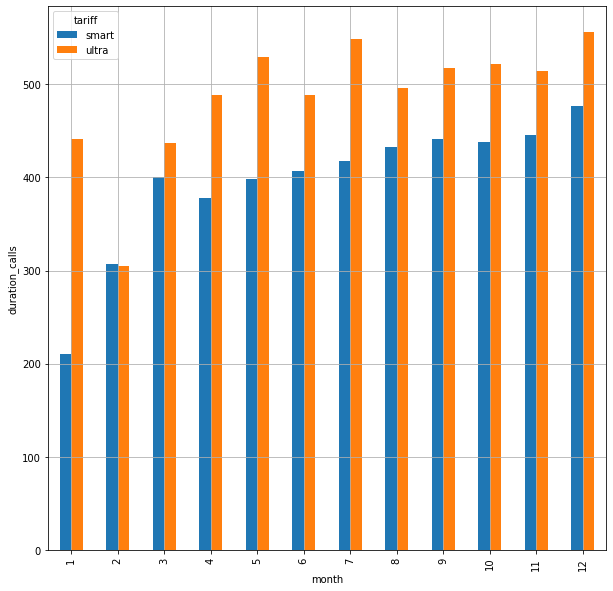


Пользователи тарифа "Смарт".
Среднее: 396
Дисперсия: 4803
Стандартное отклонение: 69
Диапазон значений: от 188 до 604.

Пользователи тарифа "Ультра".
Среднее: 487
Дисперсия: 4250
Стандартное отклонение: 65
Диапазон значений: от 200 до 682.

COUNT_MESSAGES


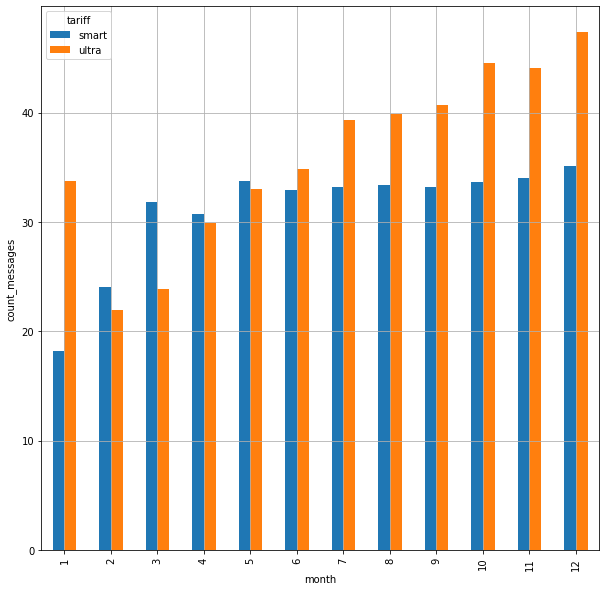


Пользователи тарифа "Смарт".
Среднее: 31
Дисперсия: 23
Стандартное отклонение: 5
Диапазон значений: от 17 до 45.

Пользователи тарифа "Ультра".
Среднее: 36
Дисперсия: 59
Стандартное отклонение: 8
Диапазон значений: от 8 до 59.

QUANTITY_MB


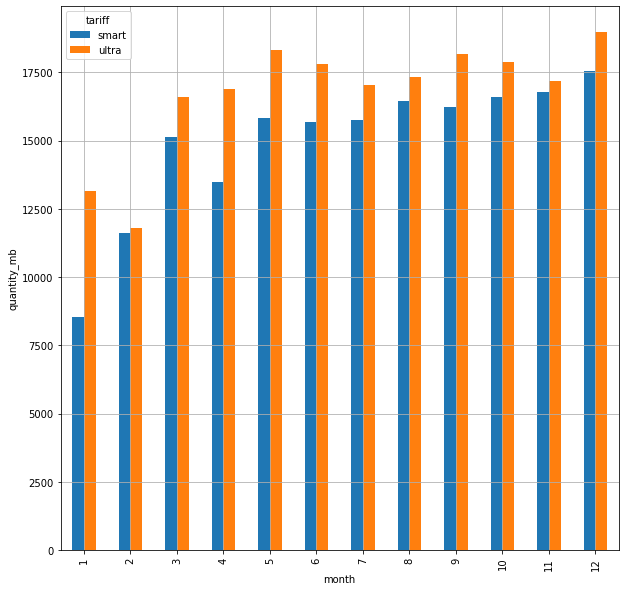


Пользователи тарифа "Смарт".
Среднее: 14969
Дисперсия: 6093753
Стандартное отклонение: 2469
Диапазон значений: от 7563 до 22374.

Пользователи тарифа "Ультра".
Среднее: 16757
Дисперсия: 4159005
Стандартное отклонение: 2039
Диапазон значений: от 8851 до 22875.

PURCHASE


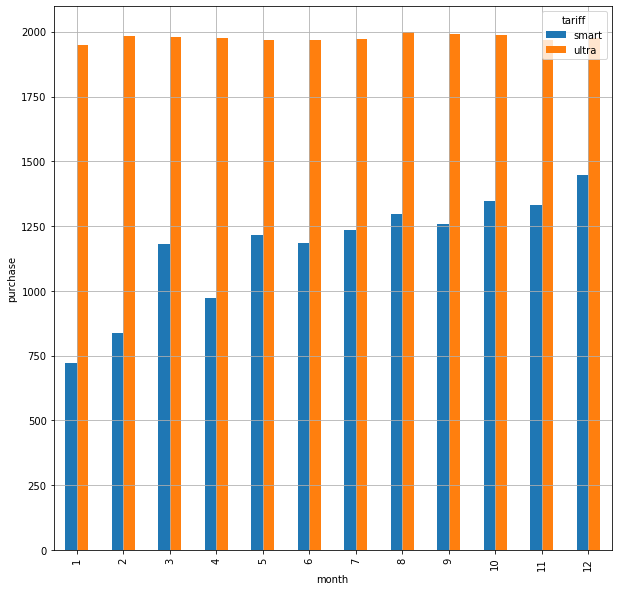


Пользователи тарифа "Смарт".
Среднее: 1169
Дисперсия: 42883
Стандартное отклонение: 207
Диапазон значений: от 548 до 1790.

Пользователи тарифа "Ультра".
Среднее: 1976
Дисперсия: 143
Стандартное отклонение: 12
Диапазон значений: от 1133 до 2012.



In [287]:
for name in ['duration_calls', 'count_messages', 'quantity_mb', 'purchase']:
    print(name.upper())
    
    # Получаем необходимую выборку для построения столбчатого графика. Строим сводную таблицу, индексы - месяцы года, столбцы -
    # тарифы "Ультра" и "Смарт", значения - значения исследуемых столбцов, функция - среднее.
    test = users.pivot_table(index='month', columns='tariff', values=name, aggfunc='mean')
    test.plot(kind='bar', figsize=(10,10), grid=True)  # строим столбчатый график
    plt.ylabel(name);                                  # подписываем ось ординат
    plt.show()                                         # выводим график на экран
    
    # считаем среднее, дисперсию, стандартное отклонение и диапазон значений
    mean_smart = test['smart'].mean()
    var_smart = np.var(test['smart'])
    std_smart = np.std(test['smart'])
    bottom_smart = mean_smart - 3 * std_smart
    if bottom_smart < 0:                               # применяем условие, если нижнее значение диапазона будет меньше 0
        bottom_smart = 0
    top_smart = mean_smart + 3 * std_smart
    print()
    # Выводим статистические характеристики на экран
    print('Пользователи тарифа "Смарт".')
    print('Среднее: {:.0f}'.format(mean_smart))
    print('Дисперсия: {:.0f}'.format(var_smart))
    print('Стандартное отклонение: {:.0f}'.format(std_smart))
    print('Диапазон значений: от {:.0f} до {:.0f}.'.format(bottom_smart, top_smart))
    print()
    # Аналогичные действия повторяем для тарифа "Ультра"
    mean_ultra = test['ultra'].mean()
    var_ultra = np.var(test['ultra'])
    std_ultra = np.std(test['ultra'])
    bottom_ultra = mean_smart - 3 * std_ultra
    if bottom_ultra < 0: 
        bottom_ultra = 0
    top_ultra = mean_ultra + 3 * std_ultra
    print('Пользователи тарифа "Ультра".')
    print('Среднее: {:.0f}'.format(mean_ultra))
    print('Дисперсия: {:.0f}'.format(var_ultra))
    print('Стандартное отклонение: {:.0f}'.format(std_ultra))
    print('Диапазон значений: от {:.0f} до {:.0f}.'.format(bottom_ultra, top_ultra))
    print()

* В среднем пользователи тарифа "Смарт" разговаривают 396 минут в месяц, пользователи тарифа "Ультра" - 487 минут в месяц. Стандартные отклонения отличаются не сильно. В среднем пользователи тарифа "Смарт" разговаривают на 100 минут меньше чем пользователи тарифа "Ультра". Также можно сказать что, чем ближе к концу года, тем больше клиенты разговаривают по телефону. Также у клиенты тарифа "Ультра" в некоторые месяцы (январь, май, июль) заметно больше тратят минут разговора, нежели в остальные месяцы и чем пользователи тарифа "Смарт".
* В среднем пользователи тарифа "Смарт" отправляют 31 сообщение в месяц, пользователи тарифа "Ультра" - 36 сообщений в месяц. В целом клиенты тарифа "Смарт" отправляют на 5 сообщений в месяц меньше, чем "Ультра", т.е. различие незначительное. У клиентов тарифа "Ультра" также выделяется месяц январь, большое количество сообщений, затем спад и постепенное увеличение количества сообщений ближе к концу года. У клиентов тарифа "Смарт" в первые месяцы (кроме января) среднее количество сообщений больше, чем у "Ультра", до месяца май, затем остается примерно на одном уровне до конца года.
* В среднем пользователи тарифа "Смарт" потребляют 14969 Мб трафика в месяц, пользователи тарифа "Ультра" - 16757 Мб трафика в месяц. У клиентов тарифа "Смарт" в целом наблюдается рост потребления объема трафика ближе к концу года, у "Ультра" четкой зависимости не наблюдается. В среднем клиенты тарифа "Ультра" потребляют на 2 Гб трафика больше, чем "Смарт".
* В среднем клиенты тарифа "Смарт" тратят 1169 рублей в месяц за услуги компании, "Ультра" - 1976 рублей в месяц. У пользователей тарифа "Смарт" выручка увеличивается ближе к концу года, у "Ультра" - остается примерно на одном и том же уровне.

------

### Проверка гипотез
Проверим гипотезу: средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются.

Итак, 
* **нулевая гипотеза** - средние выручки пользователей тарифов «Ультра» и «Смарт» **равны** между собой 
* **альтернативная гипотеза** - средние выручки пользователей тарифов «Ультра» и «Смарт» **не равны** между собой.

In [290]:
# Создадим интересующие нас выборки
users_smart_purchase = users.query('tariff == "smart"')['purchase']
users_ultra_purchase = users.query('tariff == "ultra"')['purchase']

# Примем общепринятое пороговое значение 5%
alpha = .05

# Для проверки гипотезы используем метод scipy.stats.ttest_ind (array1, array2, equal_var)
# аргумент equal_var приравняем False, так как дисперсии выборок не равны
results = st.ttest_ind(users_smart_purchase, users_ultra_purchase, equal_var = False)
print('p-значение:', results.pvalue)

# прописываем условия вывода результата проверки гипотезы
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 8.79746146759166e-305
Отвергаем нулевую гипотезу


Результат: **отвергаем** нулевую гипотезу.

Следующая гипотеза: средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.
* **Нулевая гипотеза** - средняя выручка пользователей из Москвы **равна** средней выручке пользователей из других регионов.
* **Альтернативная гипотеза** - средняя выручка пользователей из Москвы **не равна** средней выручке пользователей из других регионов.

In [291]:
# Создадим интересующие нас выборки
users_moscow_purchase = users.query('city == "Москва"')['purchase']
users_not_moscow_purchase = users.query('city != "Москва"')['purchase']

# Примем общепринятое пороговое значение 5%
alpha = .05

results = st.ttest_ind(users_moscow_purchase, users_not_moscow_purchase)
print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.22577783117021913
Не получилось отвергнуть нулевую гипотезу


Результат: **не отвергаем** нулевую гипотезу.

------

## Результаты работы
### Описание работы

На 1 этапе проекта были исправлены ошибки в данных, значения округлены в большую сторону по условию тарифов. Также данные были приведены к нужным типам. Посчитаны необходимые для исследования значения и все таблицы объединены в один "датасет". Посчитана выручка с каждого клиента в месяц. Далее были удалены выбросы в данных.

### Результаты исследователького анализа
Покажем результаты анализа в виде таблицы.

Характеристика / Тариф | Смарт | Ультра 
---------------------|-------|------
**Продолжительность звонков** |  | 
Среднее | 396 минут | 487 минут
Дисперсия | 4803 | 4250
Стандартное отклонение | 69 минут| 65 минут
Диапазон значений | 188 - 604 минуты | 200 - 682 минуты
**Количество сообщений** |  | 
Среднее | 31 сообщение | 36 сообщений
Дисперсия | 23 | 59
Стандартное отклонение | 5 сообщений| 8 сообщений
Диапазон значений | 17 - 45 сообщений | 8 - 59 сообщений
**Объем интернет-трафика** |  | 
Среднее | 14969 Мб | 16757 Мб
Дисперсия | 6093753 | 4159005
Стандартное отклонение | 2469 Мб | 2039 Мб
Диапазон значений | 7563 - 22374 Мб | 8851 - 22875 Мб
**Выручка** |  | 
Среднее | 1169 рублей | 1976 рублей
Дисперсия | 42883 | 143
Стандартное отклонение | 207 рублей | 12 рублей
Диапазон значений | 548 - 1790 рублей | 1133 - 2012 рублей

Проанализировав данную таблицу, можно сделать вывод, что компании Мегалайн выгоднее вложиться в рекламу тарифа "Ультра", так как клиенты тарифа "Ультра" в среднем не намного больше тратят минут разговора, отправляют сообщений и потребляют интернет-трафика, чем клиенты тарифа "Смарт", но зато платят ежемесячную плату в 3,5 раза больше.

### Результаты проверки гипотез

1. Проверялась гипотеза: средние выручки пользователей тарифов «Ультра» и «Смарт» **равны** между собой. В результате проверки эта гипотеза **была отвергнута**.
2. Проверялась гипотеза: средняя выручка пользователей из Москвы **равна** средней выручке пользователей из других регионов. В результате проверки эта гипотеза **не была отвергнута**.